In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import SimpleITK as sitk

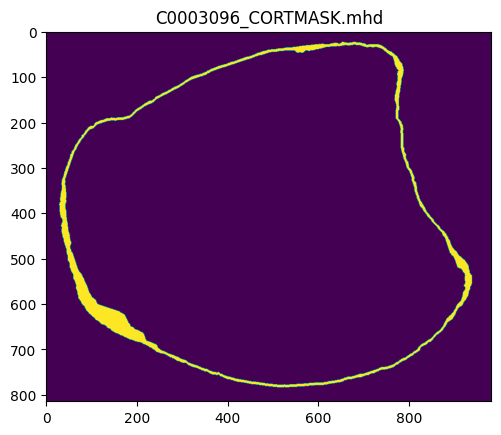

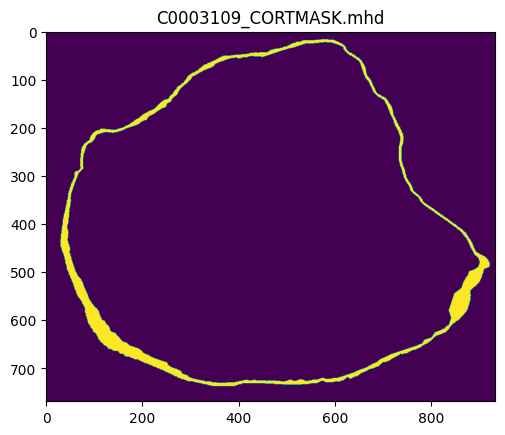

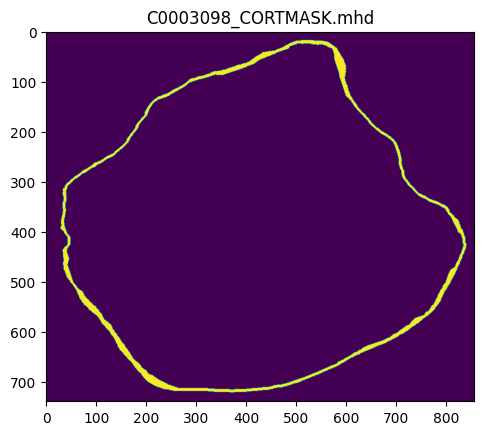

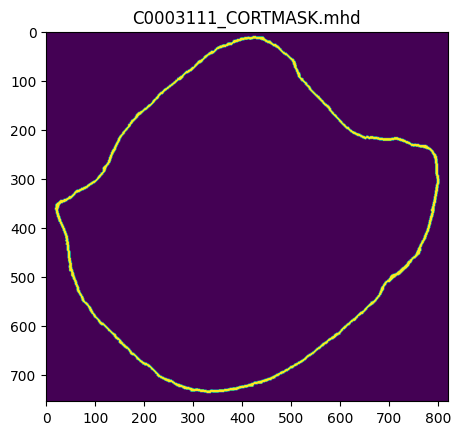

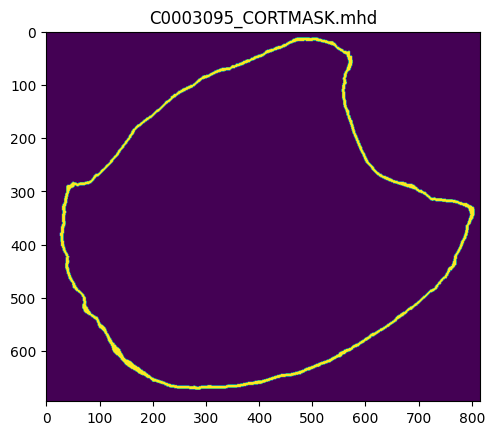

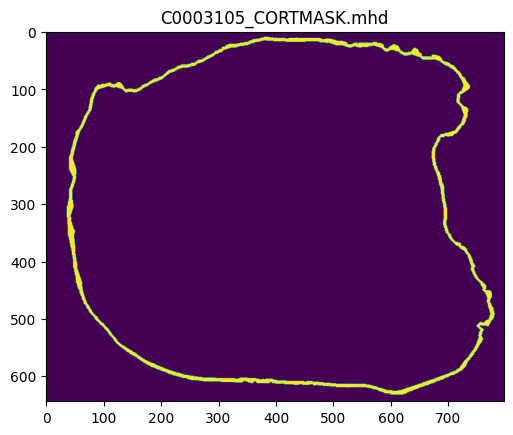

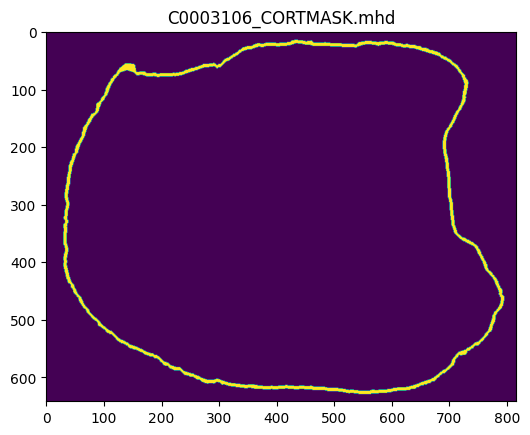

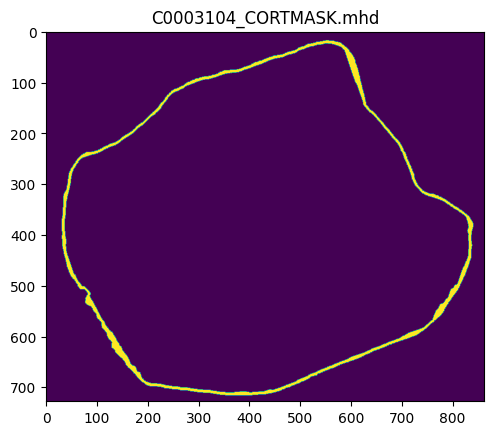

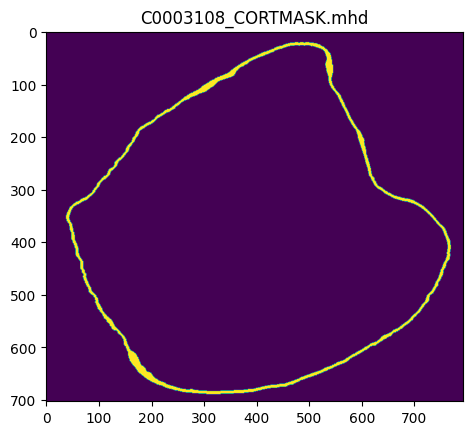

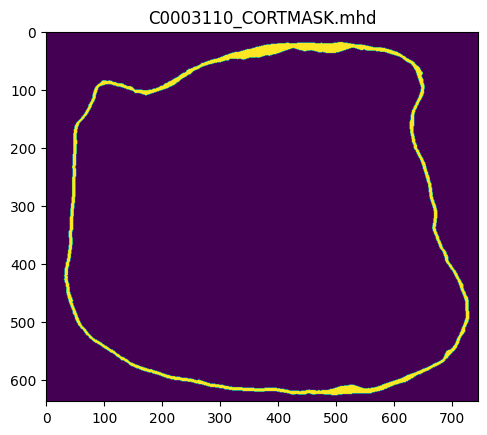

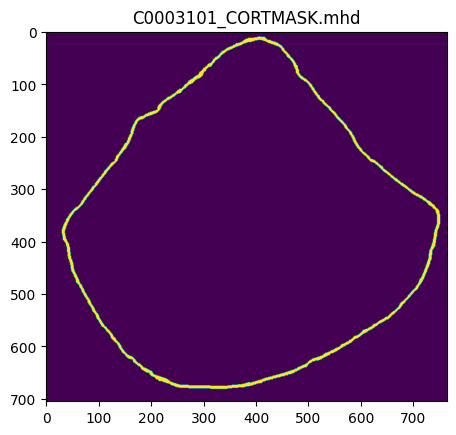

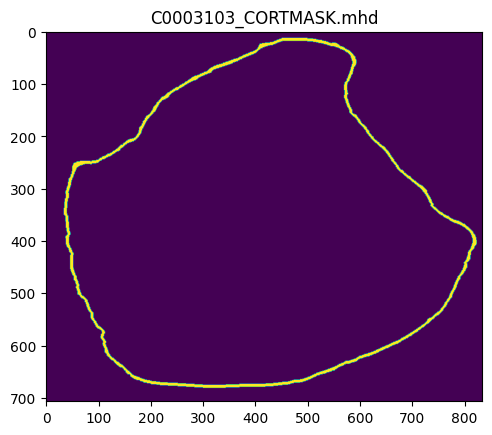

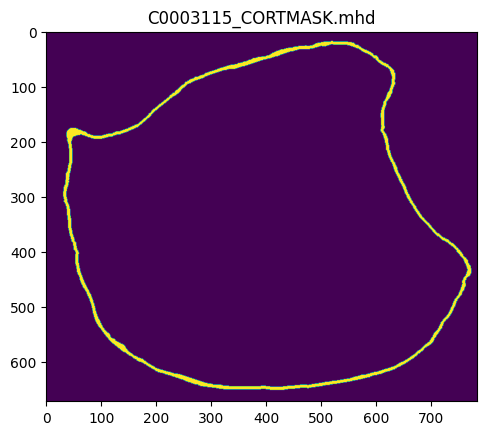

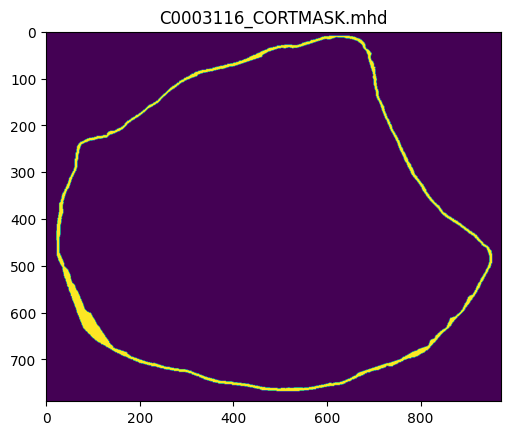

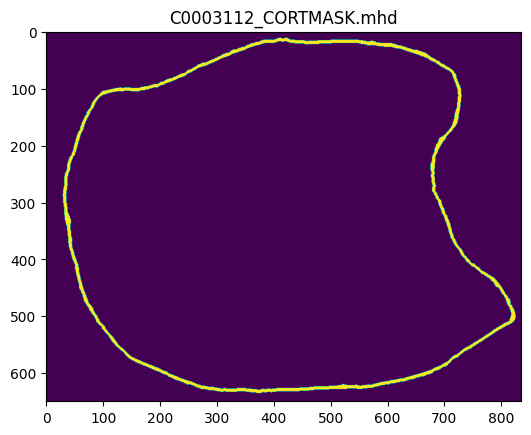

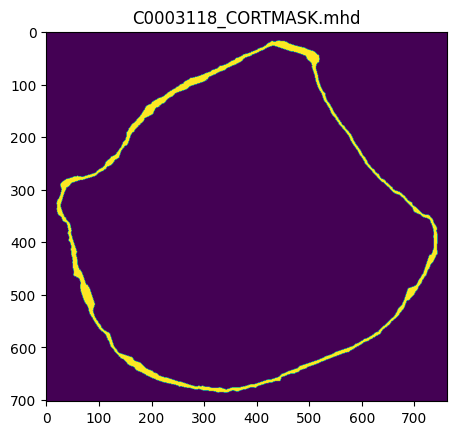

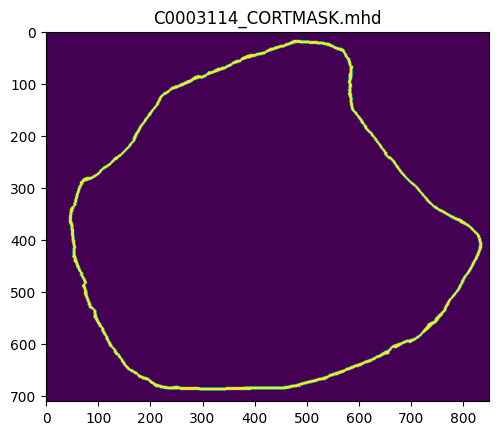

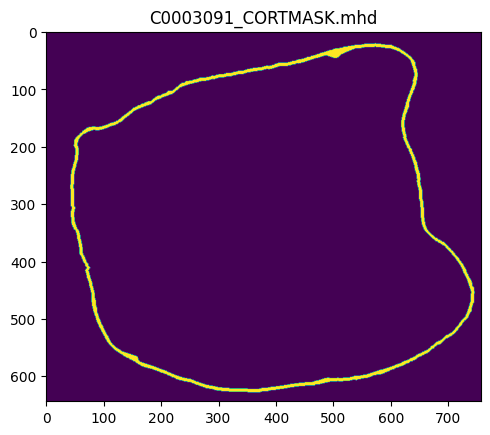

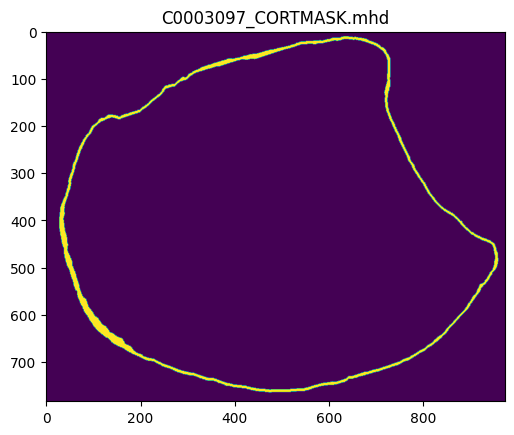

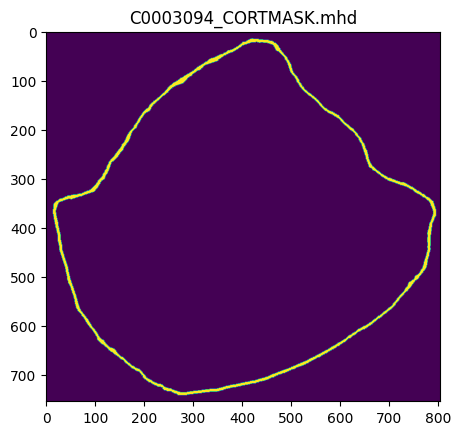

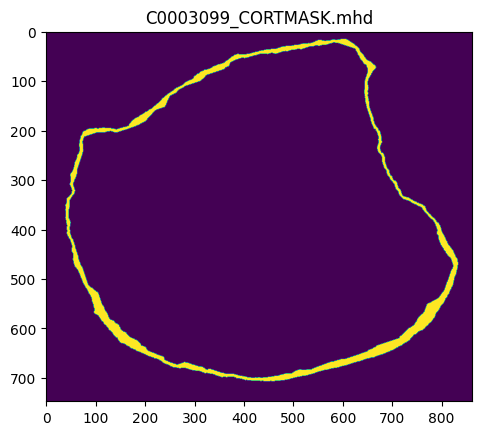

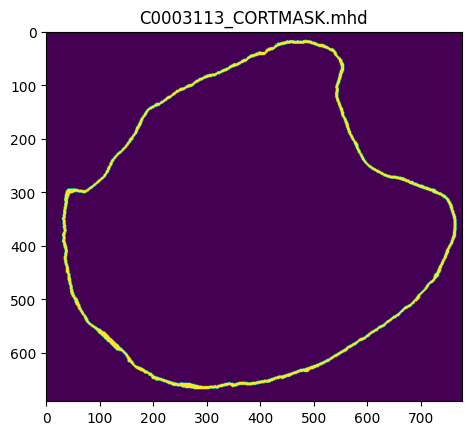

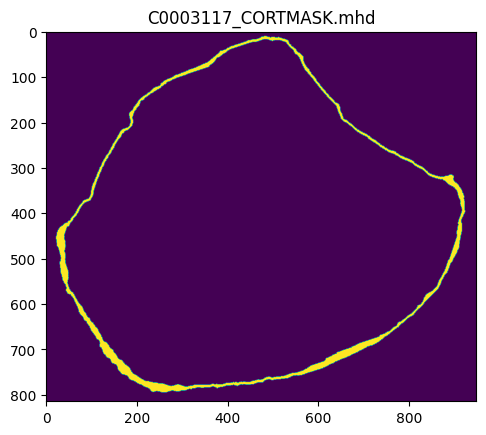

In [18]:
basepath = Path('/home/simoneponcioni/Documents/01_PHD/03_Methods/HFE/01_DATA/TIBIA')
# iterate over all subdirectories and plot every 'CORTMASK' file in the directory

images_to_flip = ['3109', '3098', '3095', '3105', '3106', '3110', '3115', '3116', '3114', '3091']
flipped_directory = basepath / 'flipped'
flipped_directory.mkdir(exist_ok=True)

def flip_image(imnp):
    return np.flip(imnp, axis=2)

def save_image(imnp, path):
    img = sitk.GetImageFromArray(imnp)
    sitk.WriteImage(img, path)

for file in basepath.iterdir():
    if file.name.endswith('_CORTMASK.mhd') and file.is_file():
        img = sitk.ReadImage(str(file))
        img = sitk.GetArrayFromImage(img)
        if any(name in file.name for name in images_to_flip):
            img = flip_image(img)
        plt.figure()
        plt.title(file.name)
        plt.imshow(img[-50,:,:])
        plt.show()
        plt.close()
        save_image(img, flipped_directory / file.name)